In [1]:
#Importamos las librerías que utilizaremos en nuestro proyecto 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
from IPython.display import display,HTML
import seaborn as sns

In [3]:
#Se carga df
chile_out = pd.read_csv("Chile_no_null.csv")
chile_out

,ID,host_response_time,host_response_rate,host_acceptance_rate,hosTrue_is_superhost,host_has_profile_pic,host_identity_verified,host_listings_count,neighbourhood_cleansed,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month
0,1.024440e+05,Unknown,0.0,0.00,False,True,False,1,La Florida,-33.559810,...,4.5,4.7,4.6,4.8,4.8,4.8,4.6,False,1,0.00
1,4.939200e+04,within a day,0.5,0.00,False,True,True,3,Providencia,-33.432660,...,4.5,4.7,4.6,4.8,4.8,4.8,4.6,True,2,0.00
2,2.422572e+07,a few days or more,0.0,0.00,False,True,False,1,Quilicura,-33.303190,...,4.5,4.7,4.6,4.8,4.8,4.8,4.6,True,1,0.00
3,2.535240e+07,Unknown,0.0,0.00,False,True,False,1,La Pintana,-33.596220,...,4.5,4.7,4.6,4.8,4.8,4.8,4.6,True,1,0.00
4,3.330526e+07,within a day,0.6,0.33,False,True,False,1,La Florida,-33.563270,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,True,1,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8154,6.500360e+17,within a few hours,1.0,0.97,False,True,False,1,Santiago,-33.452345,...,4.5,4.7,4.6,4.8,4.8,4.8,4.6,True,1,0.00
8155,6.501450e+17,within an hour,0.9,0.93,False,True,True,1,Santiago,-33.437970,...,4.5,4.7,4.6,4.8,4.8,4.8,4.6,True,9,0.00
8156,6.504620e+17,within a few hours,0.6,1.00,False,True,False,0,Macul,-33.477360,...,4.5,4.7,4.6,4.8,4.8,4.8,4.6,True,2,0.00
8157,6.505440e+17,within an hour,1.0,0.78,False,False,True,0,San Miguel,-33.504680,...,4.5,4.7,4.6,4.8,4.8,4.8,4.6,True,2,0.00


### Análisis gráfico de nulos

#### host_listings_count

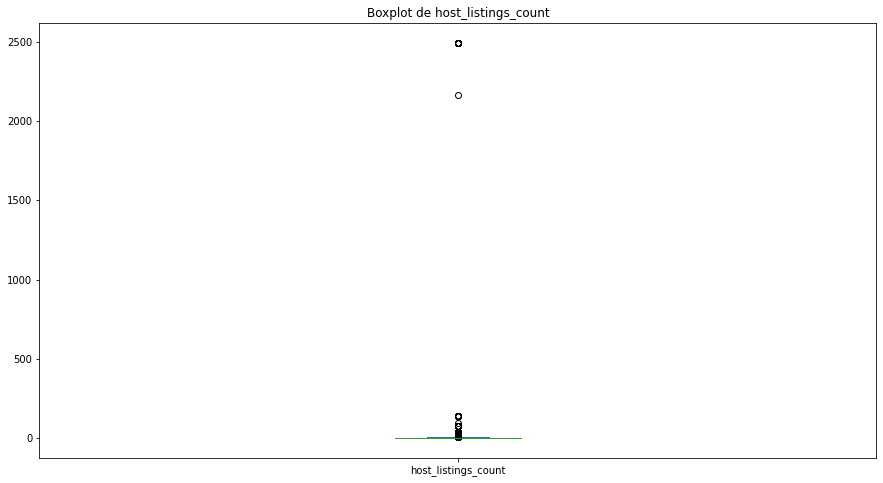

In [5]:
fig = plt.figure(figsize =(15, 8))
chile_out["host_listings_count"].plot(kind='box')
plt.title("Boxplot de host_listings_count")
plt.show() 

In [16]:
#Identificación de límites: método de desviación
h1=chile_out["host_listings_count"]
LS1= h1.mean() + .5*h1.std()
LI1= h1.mean() - .5*h1.std()
print("Limite superior permitido", LS1)
print("Limite inferior permitido", LI1)

Limite superior permitido 59.20619336001185
Limite inferior permitido -43.44004554777996


In [17]:
#Sustituimos los outliers con el valor de la moda 
host_out = chile_out.loc[chile_out['host_listings_count']< 59.206, 'host_listings_count'].mode()
chile_out["host_listings_count"] = np.where(chile_out["host_listings_count"] >59.206,host_out ,chile_out['host_listings_count'])

In [ ]:
#Comprobamos
fig = plt.figure(figsize =(15, 8))
chile_out["host_listings_count"].plot(kind='box')
plt.title("Boxplot de host_listings_count")
plt.show() 

#### bathrooms_text

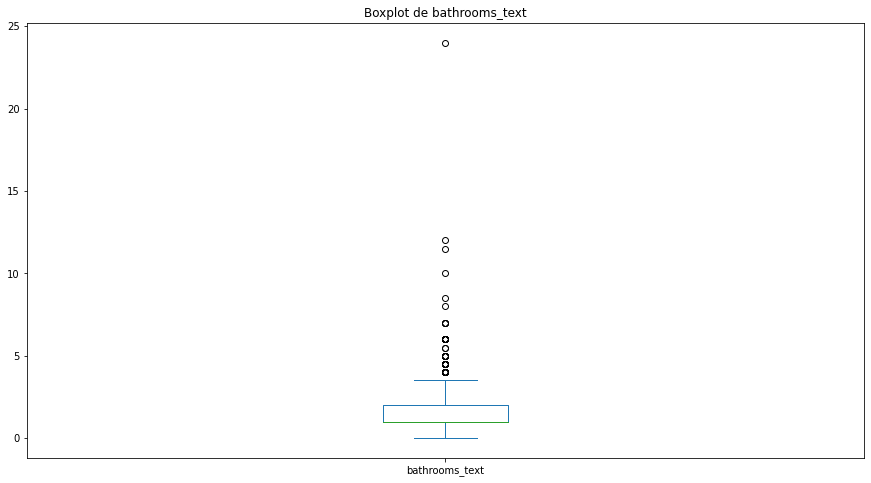

In [21]:
#Análisis gráfico
fig = plt.figure(figsize =(15, 8))
chile_out["bathrooms_text"].plot(kind='box')
plt.title("Boxplot de bathrooms_text")
plt.show() 

In [29]:
#Identificación de límites: método de desviación
b1=chile_out["bathrooms_text"]
LS2= b1.mean() + 13*b1.std()
LI2= b1.mean() - 13*b1.std()
print("Limite superior permitido", LS2)
print("Limite inferior permitido", LI2)

Limite superior permitido 10.661510320620206
Limite inferior permitido -7.9673075996985245


In [32]:
#Sustituimos los outliers con el valor de la mediana 
bath_out = chile_out.loc[chile_out['bathrooms_text']< 10, 'bathrooms_text'].median()
chile_out["bathrooms_text"] = np.where(chile_out["bathrooms_text"] > 10,bath_out ,chile_out['host_listings_count'])

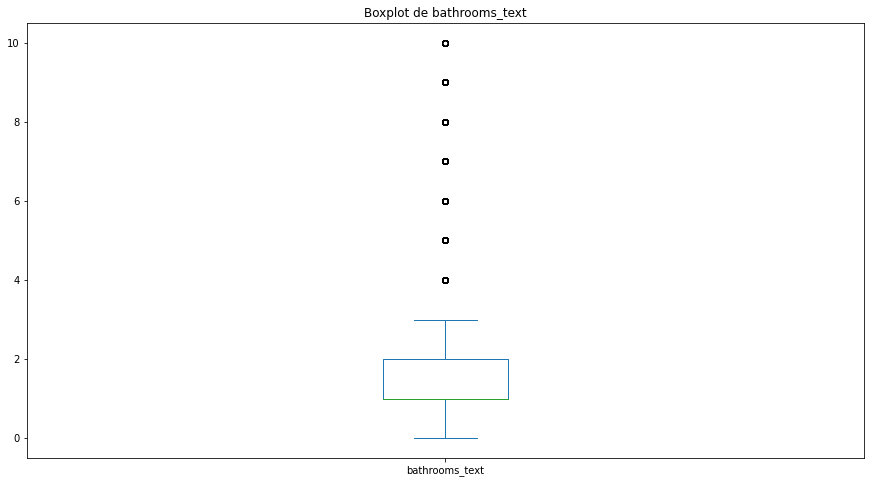

In [33]:
#Análisis gráfico
fig = plt.figure(figsize =(15, 8))
chile_out["bathrooms_text"].plot(kind='box')
plt.title("Boxplot de bathrooms_text")
plt.show() 

### bedrooms 

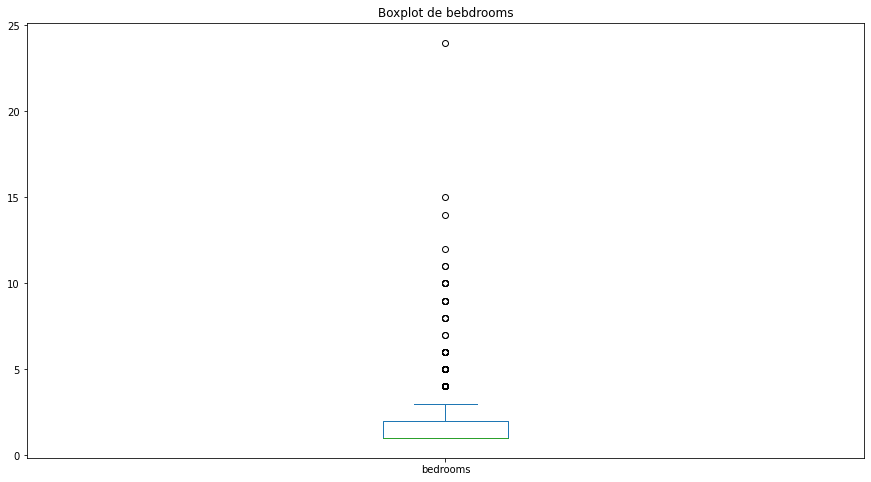

In [34]:
#Análisis gráfico bedrooms
fig = plt.figure(figsize =(15, 8))
chile_out["bedrooms"].plot(kind='box')
plt.title("Boxplot de bebdrooms")
plt.show() 

In [38]:
#Identificación de límites: método de desviación
bedroom=chile_out["bedrooms"]
LS3= bedroom.mean() + 3*bedroom.std()
LI3= bedroom.mean() - 3*bedroom.std()
print("Limite superior permitido", LS3)
print("Limite inferior permitido", LI3)

Limite superior permitido 4.142223629647882
Limite inferior permitido -1.280843558560739


In [41]:
#Sustituimos los outliers con el valor de la mediana 
#Utilizaremos 15 cuartos como límite superior 
bed_out = chile_out.loc[chile_out['bedrooms']< 15, 'bedrooms'].median()
chile_out["bedrooms"] = np.where(chile_out["bedrooms"] > 15,bed_out ,chile_out['bedrooms'])

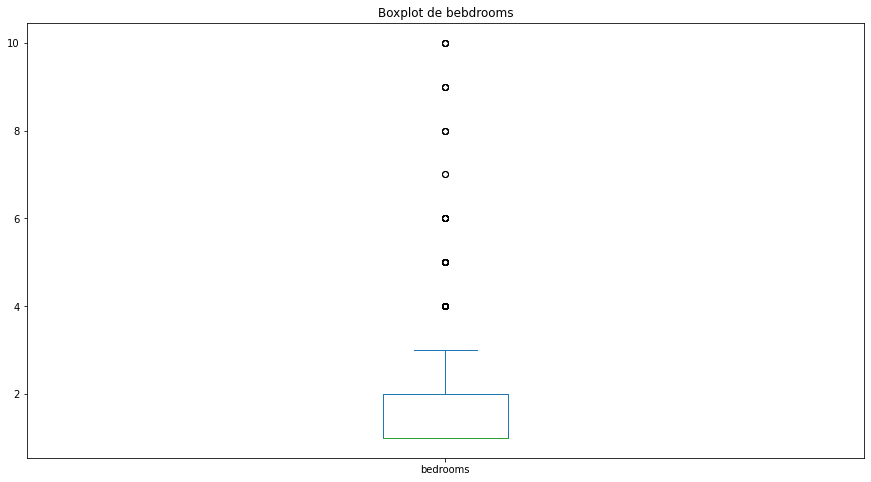

In [43]:
#Análisis comprobación bedrooms 
fig = plt.figure(figsize =(15, 8))
chile_out["bedrooms"].plot(kind='box')
plt.title("Boxplot de bebdrooms")
plt.show() 